# 소프트맥스 회귀 구현하기 (Keras)

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [ ]:
df = load_iris()
df.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
x_data = np.array(df.data, dtype=np.float32)
y_data = np.array(df.target, dtype=np.int32)

nb_features = x_data.shape[1]
nb_classes = len(set(y_data))

print("x_data:", x_data.shape)
print("y_data:", y_data.shape)

print("nb_features:", nb_features)
print("nb_classes:", nb_classes)

x_data: (150, 4)
y_data: (150,)
nb_features: 4
nb_classes: 3


In [ ]:
x_data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]], dtype=float32)

In [ ]:
# One-Hot Encoding
y_one_hot = tf.one_hot(indices=list(y_data), depth=nb_classes)

In [ ]:
y_one_hot[:5]

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)>

In [ ]:
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트

model = Sequential()

# 입력의 차원은 4, 출력의 차원은 3, activation function은 softmax
model.add(Dense(3, input_dim=4, activation='softmax'))

# 학습률(learning rate, lr)은 0.01로.
sgd = optimizers.SGD(lr=0.01)

# 옵티마이저는 경사하강법의 일종인 adam을 사용.
# 손실 함수(Loss function)는 크로스 엔트로피 함수를 사용.
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 200번 시도.
history = model.fit(x_data, y_one_hot, batch_size=1, epochs=200)

Epoch 1/200
150/150 [==============================] - 0s 1ms/step - loss: 4.2372 - accuracy: 0.3333
Epoch 2/200
150/150 [==============================] - 0s 1ms/step - loss: 2.9042 - accuracy: 0.3333
Epoch 3/200
150/150 [==============================] - 0s 1ms/step - loss: 2.0162 - accuracy: 0.3333
Epoch 4/200
150/150 [==============================] - 0s 1ms/step - loss: 1.4551 - accuracy: 0.3333
Epoch 5/200
150/150 [==============================] - 0s 1ms/step - loss: 1.2249 - accuracy: 0.3533
Epoch 6/200
150/150 [==============================] - 0s 1ms/step - loss: 1.1208 - accuracy: 0.3533
Epoch 7/200
150/150 [==============================] - 0s 1ms/step - loss: 1.0446 - accuracy: 0.3867
Epoch 8/200
150/150 [==============================] - 0s 1ms/step - loss: 0.9790 - accuracy: 0.4133
Epoch 9/200
150/150 [==============================] - 0s 1ms/step - loss: 0.9187 - accuracy: 0.5733
Epoch 10/200
150/150 [==============================] - 0s 1ms/step - loss: 0.8658 - accura

# 소프트맥스 회귀 구현하기 (Tape)

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [ ]:
df = load_iris()
df.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
x_data = np.array(df.data, dtype=np.float32)
y_data = np.array(df.target, dtype=np.int32)

nb_features = x_data.shape[1]
nb_classes = len(set(y_data))

print("x_data:", x_data.shape)
print("y_data:", y_data.shape)

print("nb_features:", nb_features)
print("nb_classes:", nb_classes)

x_data: (150, 4)
y_data: (150,)
nb_features: 4
nb_classes: 3


In [ ]:
# Weights
tf.random.set_seed(2020)
W = tf.Variable(tf.random.normal([nb_features, nb_classes], mean=0.0))
b = tf.Variable(tf.random.normal([nb_classes], mean=0.0))

# One-Hot Encoding
y_one_hot = tf.one_hot(indices=list(y_data), depth=nb_classes)

print('# Weights: \n', W.numpy(), '\n\n# Bias: \n', b.numpy())

# Weights: 
 [[-0.10099822  0.6847899   1.6258512 ]
 [ 0.88112587 -0.63692456 -0.1427695 ]
 [ 0.82411087 -0.9132699  -0.45101833]
 [ 0.58053356  1.3066356  -0.60428965]] 

# Bias: 
 [ 0.38414615 -0.6159301  -0.5453214 ]


In [ ]:
# Learning Rate
learning_rate = 0.01

# Softmax Function
def softmax(X):
    sm = tf.nn.softmax(tf.matmul(x_data, W) + b)
    return sm

# Training
for i in range(10000+1):

    with tf.GradientTape() as tape:

        sm = softmax(x_data)
        cost = tf.reduce_mean(-tf.reduce_sum(y_one_hot*tf.math.log(sm), axis=1))        
        W_grad, b_grad = tape.gradient(cost, [W, b])

        W.assign_sub(learning_rate * W_grad)
        b.assign_sub(learning_rate * b_grad)

    if i % 1000 == 0:
        print(">>> #%s \n Weights: \n%s \n Bias: \n%s \n cost: %s\n" % (i, W.numpy(), b.numpy(), cost.numpy()))

>>> #0 
 Weights: 
[[-0.11743642  0.70453906  1.6225401 ]
 [ 0.87678254 -0.62771267 -0.14763813]
 [ 0.80348897 -0.8990886  -0.44457772]
 [ 0.5725719   1.3110503  -0.60074264]] 
 Bias: 
[ 0.382134   -0.61260384 -0.54663545] 
 cost: 3.9675086

>>> #1000 
 Weights: 
[[ 0.16433328  1.3574839   0.68781775]
 [ 1.7573065  -0.64877206 -1.007102  ]
 [-0.8606213  -0.5406397   0.8610839 ]
 [-0.19550528  1.0364842   0.4419003 ]] 
 Bias: 
[ 0.5655053  -0.43386924 -0.9087409 ] 
 cost: 0.40306073

>>> #2000 
 Weights: 
[[ 0.3168866   1.532144    0.36060667]
 [ 2.0306032  -0.6994984  -1.2296745 ]
 [-1.2645829  -0.5937341   1.3181393 ]
 [-0.3816476   0.7259963   0.9385296 ]] 
 Bias: 
[ 0.62806755 -0.33476606 -1.0704057 ] 
 cost: 0.2934371

>>> #3000 
 Weights: 
[[ 0.42719203  1.6423253   0.14011881]
 [ 2.2220879  -0.712384   -1.4082736 ]
 [-1.5467923  -0.63064843  1.6372666 ]
 [-0.511728    0.4970248   1.297582  ]] 
 Bias: 
[ 0.6729266 -0.2532305 -1.1967993] 
 cost: 0.23829417

>>> #4000 
 Weights: 
[[

In [ ]:
predicted = tf.argmax(softmax(x_data), axis=1)
real = tf.argmax(y_one_hot, axis=1)

def acc(predicted, real):
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, real), dtype=tf.float32))
    return accuracy

accuracy = acc(predicted, real).numpy()
print("Accuracy: %s" % accuracy)

Accuracy: 0.97333336


# 다층 퍼셉트론으로 MNIST 분류하기

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense, Flatten, Dropout # 케라스의 Dense(), Flatten()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train[0].shape)
print(y_train)

(28, 28)
[5 0 4 ... 5 6 8]


In [ ]:
model = Sequential([
  Flatten(input_shape=(28, 28)), # Dense(28*28)
  Dense(128, activation='relu'),
  Dropout(0.2),
  Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3019 - accuracy: 0.9121
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1466 - accuracy: 0.9571
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1089 - accuracy: 0.9666
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0890 - accuracy: 0.9722
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0751 - accuracy: 0.9768
313/313 - 1s - loss: 0.0780 - accuracy: 0.9758


[0.07796133309602737, 0.9757999777793884]

# 다층 퍼셉트론으로 20개의 뉴스그룹 분류하기

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

사이킷런에서는 20개의 다른 주제를 가진 18,846개의 뉴스 그룹 이메일 데이터를 제공.

In [ ]:
newsdata = fetch_20newsgroups(subset = 'train') # 'train'을 기재하면 훈련 데이터만 리턴한다.

위의 subset의 값으로 'all'을 넣으면 전체 데이터인 18,846개의 샘플을 다운로드할 수 있으며, 'train'을 넣으면 훈련 데이터를, 'test'를 넣으면 테스트 데이터를 다운로드. newsdata.keys()를 출력하면 해당 데이터의 속성을 확인.

In [ ]:
print(newsdata.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


해당 데이터는 data, filenames, target_names, target, DESCR, description이라는 6개 속성을 갖고 있음. 이 중 실제로 훈련에 사용할 속성은 이메일 본문인 data와 메일이 어떤 주제인지 기재된 숫자 레이블인 target. 우선 훈련용 샘플의 개수를 확인.

In [ ]:
print('훈련용 샘플의 개수 : {}'.format(len(newsdata.data)))


훈련용 샘플의 개수 : 11314


훈련 샘플은 11,314개가 존재. target_names에는 20개의 주제의 이름을 담고있음. 어떤 주제가 있는지 확인.

In [ ]:
print('총 주제의 개수 : {}'.format(len(newsdata.target_names)))
print(newsdata.target_names)

총 주제의 개수 : 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


이번 실습의 목적은 테스트 데이터에서 이메일 본문을 보고 20개의 주제 중 어떤 주제인지를 맞추는 것. 레이블인 target에는 총 0부터 19까지의 숫자가 들어가있는데 첫번째 샘플의 경우에는 몇 번 주제인지 확인.

In [ ]:
print('첫번째 샘플의 레이블 : {}'.format(newsdata.target[0]))

첫번째 샘플의 레이블 : 7


In [ ]:
print('7번 레이블이 의미하는 주제 : {}'.format(newsdata.target_names[7]))


7번 레이블이 의미하는 주제 : rec.autos


In [ ]:
print(newsdata.data[0]) # 첫번째 샘플 출력

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [ ]:
data = pd.DataFrame(newsdata.data, columns = ['email']) # data로부터 데이터프레임 생성
data['target'] = pd.Series(newsdata.target) # target 열 추가
data[:5] # 상위 5개 행을 출력

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 176.9+ KB


In [ ]:
data.isnull().values.any()

False

In [ ]:
print('중복을 제외한 샘플의 수 : {}'.format(data['email'].nunique()))
print('중복을 제외한 주제의 수 : {}'.format(data['target'].nunique()))

중복을 제외한 샘플의 수 : 11314
중복을 제외한 주제의 수 : 20


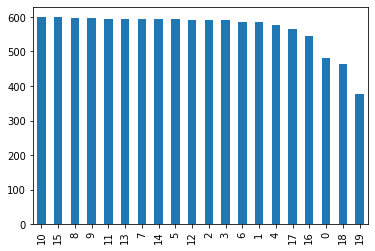

In [ ]:
data['target'].value_counts().plot(kind='bar');

In [ ]:
print(data.groupby('target').size().reset_index(name='count'))

    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


In [ ]:
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True) # 'test'를 기재하면 테스트 데이터만 리턴.
train_email = data['email'] # 훈련 데이터의 본문 저장
train_label = data['target'] # 훈련 데이터의 레이블 저장
test_email = newsdata_test.data # 테스트 데이터의 본문 저장
test_label = newsdata_test.target # 테스트 데이터의 레이블 저장

In [ ]:
max_words = 10000 # 실습에 사용할 단어의 최대 개수
num_classes = 20 # 레이블의 수

In [ ]:
def prepare_data(train_data, test_data, mode): # 전처리 함수
    t = Tokenizer(num_words = max_words) # max_words 개수만큼의 단어만 사용.
    t.fit_on_texts(train_data)
    X_train = t.texts_to_matrix(train_data, mode=mode) # 샘플 수 × max_words 크기의 행렬 생성
    X_test = t.texts_to_matrix(test_data, mode=mode) # 샘플 수 × max_words 크기의 행렬 생성
    return X_train, X_test, t.index_word

In [ ]:
X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary') # binary 모드로 변환
y_train = to_categorical(train_label, num_classes) # 원-핫 인코딩
y_test = to_categorical(test_label, num_classes) # 원-핫 인코딩

In [ ]:
print('훈련 샘플 본문의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 본문의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 본문의 크기 : (11314, 10000)
훈련 샘플 레이블의 크기 : (11314, 20)
테스트 샘플 본문의 크기 : (7532, 10000)
테스트 샘플 레이블의 크기 : (7532, 20)


In [ ]:
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[1]))
print('빈도수 상위 9999번 단어 : {}'.format(index_to_word[9999]))

빈도수 상위 1번 단어 : the
빈도수 상위 9999번 단어 : mic


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(256, input_shape=(10000,), activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(20, activation='softmax'))
    # 입력층이 10000, 은닉층 #1이 256, 은닉층 #2가 128, 출력층이 20

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)
    score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
    return score[1]

In [ ]:
modes = ['binary', 'count', 'tfidf', 'freq'] # 4개의 모드를 리스트에 저장.

for mode in modes: # 4개의 모드에 대해서 각각 아래의 작업을 반복.
    X_train, X_test, _ = prepare_data(train_email, test_email, mode) # 모드에 따라서 데이터를 전처리
    score = fit_and_evaluate(X_train, y_train, X_test, y_test) # 모델을 훈련하고 평가.
    print(mode+' 모드의 테스트 정확도:', score)

Epoch 1/5
80/80 [==============================] - 1s 14ms/step - loss: 2.3028 - accuracy: 0.3381 - val_loss: 0.9875 - val_accuracy: 0.8348
Epoch 2/5
80/80 [==============================] - 1s 7ms/step - loss: 0.8687 - accuracy: 0.7612 - val_loss: 0.4757 - val_accuracy: 0.8772
Epoch 3/5
80/80 [==============================] - 1s 6ms/step - loss: 0.4369 - accuracy: 0.8840 - val_loss: 0.3406 - val_accuracy: 0.9108
Epoch 4/5
80/80 [==============================] - 1s 7ms/step - loss: 0.2592 - accuracy: 0.9350 - val_loss: 0.3160 - val_accuracy: 0.9152
Epoch 5/5
80/80 [==============================] - 1s 6ms/step - loss: 0.1853 - accuracy: 0.9557 - val_loss: 0.3072 - val_accuracy: 0.9099
binary 모드의 테스트 정확도: 0.8266064524650574
Epoch 1/5
80/80 [==============================] - 1s 9ms/step - loss: 2.7914 - accuracy: 0.2474 - val_loss: 1.6552 - val_accuracy: 0.7323
Epoch 2/5
80/80 [==============================] - 1s 7ms/step - loss: 1.5090 - accuracy: 0.6208 - val_loss: 0.7008 - val_accu

# 함수형 API 이야기

## sequential API로 만든 모델

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model=Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))

## functional API로 만든 모델

앞에서 케라스를 사용하여 모델을 설계하는 방식을 sequential API를 사용하였다고 함. 그런데 sequential API는 여러층을 공유하거나 다양한 종류의 입력과 출력을 사용하는 등의 복잡한 모델을 만드는 일을 하기에는 한계가 있음. 이번에는 복잡한 모델을 생성할 수 있는 방식인 functional API(함수형 API)에 대해서 알아봄.

functional API는 각 층을 일종의 함수(function)로서 정의. 그리고 각 함수를 조합하기 위한 연산자들을 제공하는데, 이를 이용하여 신경망을 설계. functional API로 FFNN, RNN 등 다양한 모델을 만들면서 기존의 sequential API와의 차이를 이해.



### 피드 포워드 신경망

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# 입력
inputs = Input(shape=(10,))

hidden1 = Dense(64, activation='relu')(inputs)
hidden2 = Dense(64, activation='relu')(hidden1)

# 출력
output = Dense(1, activation='sigmoid')(hidden2)

# 입력과 출력 정의
model = Model(inputs=inputs, outputs=output)

### 선형 회귀

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

inputs = Input(shape=(3,))
output = Dense(1, activation='linear')(inputs)
linear_model = Model(inputs, output)

linear_model.compile(optimizer='sgd', loss='mse')

### 로지스틱 회귀

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

inputs = Input(shape=(3,))
output = Dense(1, activation='sigmoid')(inputs)
logistic_model = Model(inputs, output)

logistic_model.compile(optimizer='sgd', loss = 'binary_crossentropy', metrics=['accuracy'])

### 다중 입력을 받는 모델(model that accepts multiple inputs)

In [ ]:
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model

# 두 개의 입력층을 정의
inputA = Input(shape=(64,))
inputB = Input(shape=(128,))

# 첫번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
x = Dense(16, activation="relu")(inputA)
x = Dense(8, activation="relu")(x)
x = Model(inputs=inputA, outputs=x)

# 두번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
y = Dense(64, activation="relu")(inputB)
y = Dense(32, activation="relu")(y)
y = Dense(8, activation="relu")(y)
y = Model(inputs=inputB, outputs=y)

# 두개의 인공 신경망의 출력을 연결(concatenate)
result = concatenate([x.output, y.output])

# 연결된 값을 입력으로 받는 밀집층을 추가(Dense layer)
z = Dense(2, activation="relu")(result)
# 선형 회귀를 위해 activation=linear를 설정
z = Dense(1, activation="linear")(z)

# 결과적으로 이 모델은 두 개의 입력층으로부터 분기되어 진행된 후 마지막에는 하나의 출력을 예측하는 모델이 됨.
model = Model(inputs=[x.input, y.input], outputs=z)

### 다르게 보이지만 동일한 표기

encoder = Dense(128)(input)  

이와 같은 표현은  

encoder = Dense(128)  
encoder(input)

이 표현과 같음.